In [2]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

## Read data

### read fed data
 - https://fred.stlouisfed.org/

In [5]:
fed_indics = pd.read_csv('../data/FED_Indicators.csv',parse_dates=True,index_col='Date')
fed_indics.shape

(262, 11)

### read fed detail data

In [6]:
fed_indics_details = pd.read_csv('../data/FED_Indicators_Details.csv')
fed_indics_details[['id','title']].tail()

,id,title
6,MRTSMPCSM442USN,Retail Sales: Furniture and Home Furnishings S...
7,PCU4841224841221,Producer Price Index by Industry: General Frei...
8,CPHPLA01EZM661N,Consumer Price Index: Harmonized Prices: Total...
9,MNFCTRMPCIMNSA,Manufacturers Inventories
10,WPU01130603,Producer Price Index by Commodity: Farm Produc...


### Walmart's fundamental data from FMP
https://site.financialmodelingprep.com/

In [7]:
wmt_rps = pd.read_csv('../data/WMT_RPS.csv',parse_dates=True,index_col='Filling_Date')
wmt_rps.shape

(106, 1)

In [39]:
fed_indics.columns

Index(['MTSDS133FMS', 'PSUNOUSDM', 'LNU01300002', 'MIXRNSA', 'PCU3272132721',
       'APU0000FF1101', 'PCU4841224841221', 'MNFCTRMPCIMNSA', 'WPU01130603',
       'MRTSMPCSM442USN', 'CPHPLA01EZM661N'],
      dtype='object')

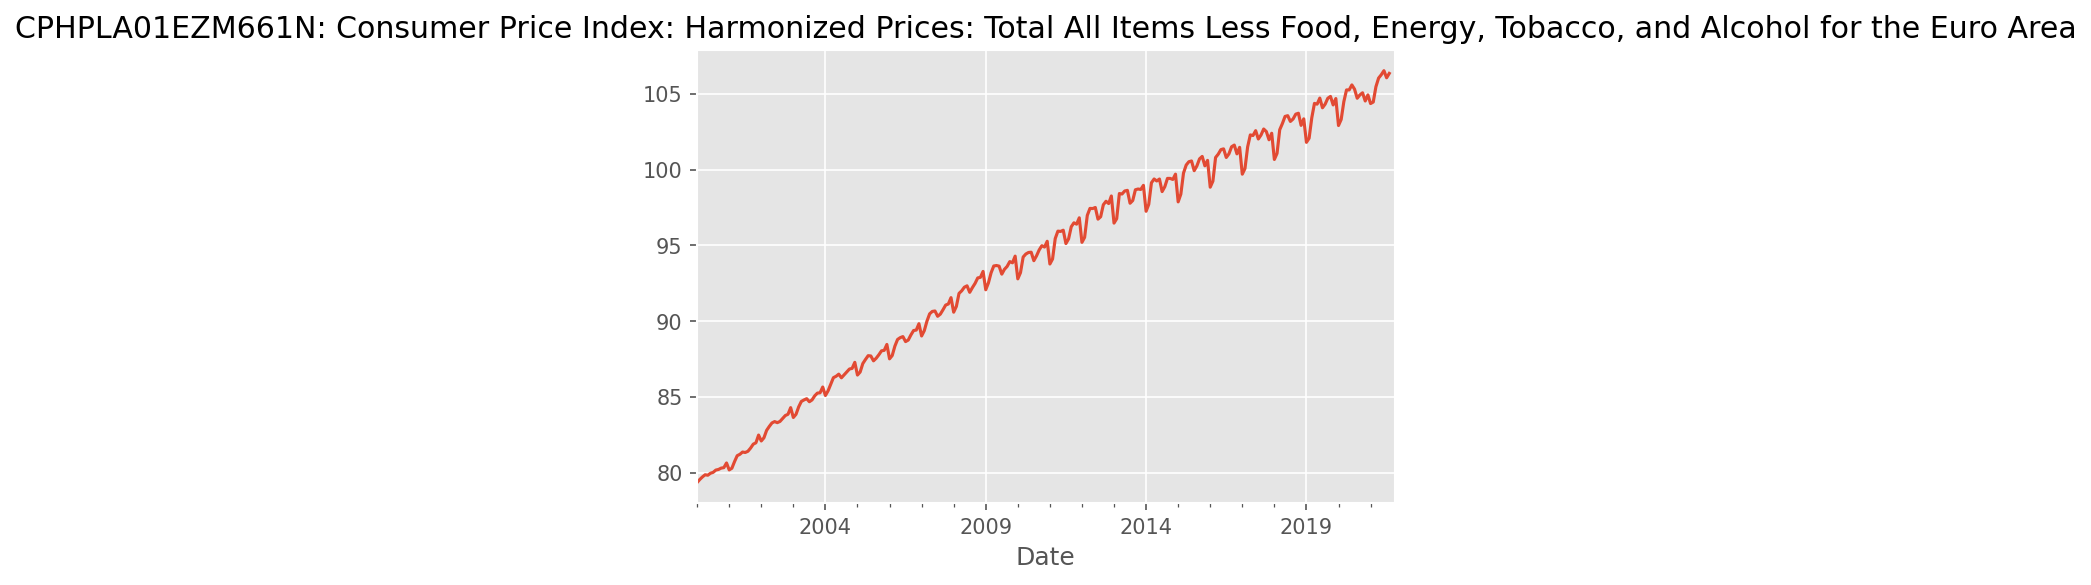

In [8]:
indc = "CPHPLA01EZM661N"
indc_details = fed_indics_details.loc[fed_indics_details['id']==indc].iloc[0]
indc_title = indc_details['title']

fed_indics[indc].plot()
plt.title(f'{indc}: {indc_title}')
plt.show()

### add a month to walmart data

In [9]:
wmt_rps.index = pd.Series(wmt_rps.index).astype('datetime64[ns]')
wmt_rps.index = pd.Series(wmt_rps.index) + MonthEnd(1)
wmt_rps = wmt_rps.sort_index()

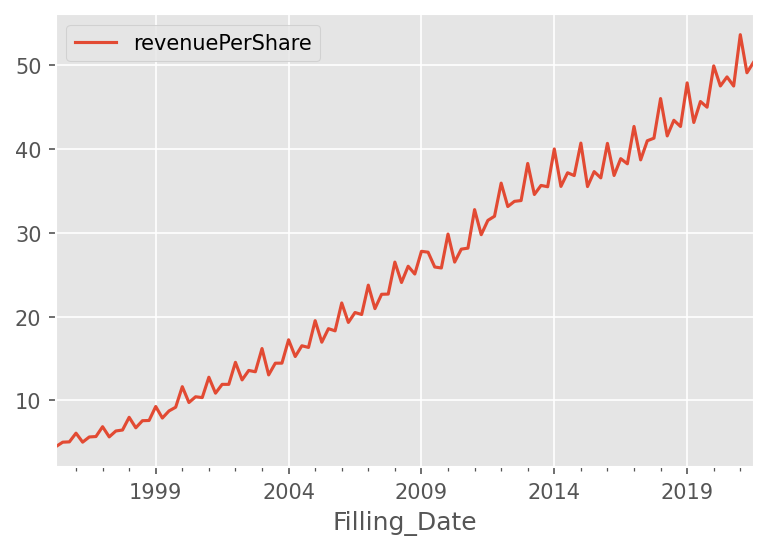

In [10]:
wmt_rps.plot()
plt.show()

### transform data using log method

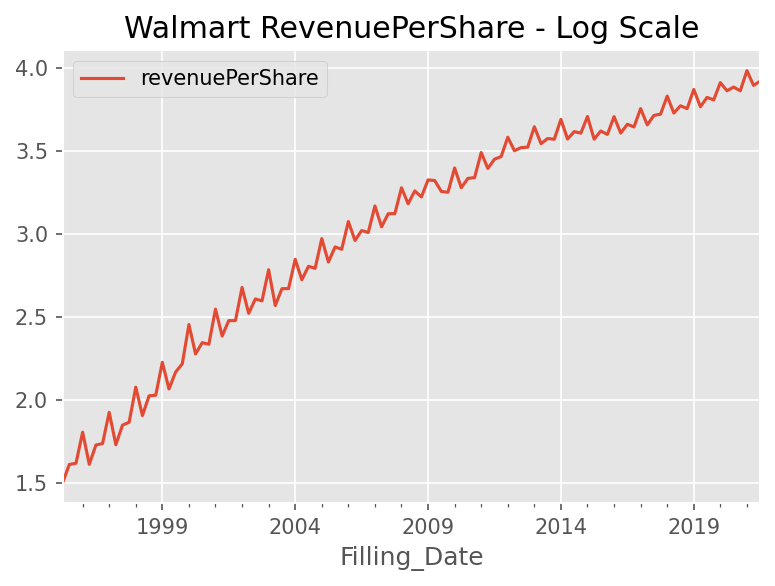

In [11]:
wmt_rps = np.log(wmt_rps)
wmt_rps.plot()
plt.title('Walmart RevenuePerShare - Log Scale')
plt.show()

In [12]:
df_combined = pd.concat([fed_indics, wmt_rps], axis=1)
df_combined = df_combined.fillna(method='ffill')
df_combined = df_combined.loc[wmt_rps.index,:]

## Transform some indicators

In [13]:
indcs_to_transform = ['MTSDS133FMS', 'LNU01300002', 'MIXRNSA', 'PCU3272132721',
       'APU0000FF1101', 'PCU4841224841221']

In [14]:
df_combined.loc[:,indcs_to_transform] = df_combined.loc[:,indcs_to_transform].pct_change()

In [83]:
df_combined

,MTSDS133FMS,PSUNOUSDM,LNU01300002,MIXRNSA,PCU3272132721,APU0000FF1101,PCU4841224841221,MNFCTRMPCIMNSA,WPU01130603,MRTSMPCSM442USN,CPHPLA01EZM661N,revenuePerShare
1995-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.503061
1995-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.611483
1995-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.619017
1996-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.805941
1996-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.612530
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,-0.914628,974.110779,0.034926,0.007716,0.000000,0.019949,0.010390,0.3,233.3,6.3,105.31,3.884399
2020-10-31,3.509648,1198.377083,-0.003552,0.036142,0.000000,0.021422,-0.003739,0.6,170.8,0.4,105.07,3.861773
2021-01-31,-0.426789,1551.076389,-0.010695,0.037886,0.024265,-0.009119,0.037222,2.3,157.2,-11.7,104.36,3.983064
2021-04-30,0.385347,1919.695833,0.005405,0.054902,0.024408,0.044785,0.034379,0.8,153.4,-3.4,106.04,3.894535


### Add lag information

In [15]:
df_lag_1 = df_combined.shift(1)
df_lag_1 = df_lag_1.add_suffix('_lag1')
\
df_lag_2 = df_combined.shift(2)
df_lag_2 = df_lag_2.add_suffix('_lag2')


df_lag_3 = df_combined.shift(3)
df_lag_3 = df_lag_3.add_suffix('_lag3')

df_lag_4 = df_combined.shift(4)
df_lag_4 = df_lag_4.add_suffix('_lag4')

df_comb_lag = pd.concat([df_combined, df_lag_1, df_lag_2, df_lag_3, df_lag_4], axis=1)
df_comb_lag


,MTSDS133FMS,PSUNOUSDM,LNU01300002,MIXRNSA,PCU3272132721,APU0000FF1101,PCU4841224841221,MNFCTRMPCIMNSA,WPU01130603,MRTSMPCSM442USN,...,LNU01300002_lag4,MIXRNSA_lag4,PCU3272132721_lag4,APU0000FF1101_lag4,PCU4841224841221_lag4,MNFCTRMPCIMNSA_lag4,WPU01130603_lag4,MRTSMPCSM442USN_lag4,CPHPLA01EZM661N_lag4,revenuePerShare_lag4
1995-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.503061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,-0.914628,974.110779,0.034926,0.007716,0.000000,0.019949,0.010390,0.3,233.3,6.3,...,0.010545,0.006841,0.002985,-0.012940,0.009873,1.4,188.4,4.4,104.08,3.822059
2020-10-31,3.509648,1198.377083,-0.003552,0.036142,0.000000,0.021422,-0.003739,0.6,170.8,0.4,...,0.008696,0.009715,0.000000,-0.009076,0.003469,0.7,181.3,1.5,104.83,3.807100
2021-01-31,-0.426789,1551.076389,-0.010695,0.037886,0.024265,-0.009119,0.037222,2.3,157.2,-11.7,...,-0.006897,0.003312,0.007440,0.037653,0.026084,1.9,229.6,-15.2,102.91,3.911113
2021-04-30,0.385347,1919.695833,0.005405,0.054902,0.024408,0.044785,0.034379,0.8,153.4,-3.4,...,-0.055556,0.019255,0.004431,0.032364,-0.027259,0.2,216.0,-51.3,105.26,3.861841


### Filter data to build train data
- Let the data start from 2002
- Replace any infinite values with nan
- Remove all the columns that have atleast 1 na val

In [16]:
df_model = df_comb_lag.loc['2002':,:]
df_model = df_model.replace([-np.inf, np.inf], np.nan)
df_model.dropna(inplace=True, axis=1)
df_model

,MTSDS133FMS,PSUNOUSDM,LNU01300002,MIXRNSA,PCU4841224841221,MNFCTRMPCIMNSA,WPU01130603,MRTSMPCSM442USN,CPHPLA01EZM661N,revenuePerShare,...,MTSDS133FMS_lag4,PSUNOUSDM_lag4,LNU01300002_lag4,MIXRNSA_lag4,PCU4841224841221_lag4,MNFCTRMPCIMNSA_lag4,WPU01130603_lag4,MRTSMPCSM442USN_lag4,CPHPLA01EZM661N_lag4,revenuePerShare_lag4
2002-01-31,-6.711729,567.434783,-0.006700,0.026339,0.008360,1.5,194.4,-24.2,82.09,2.677412,...,-7.746665,346.913043,0.001672,0.037976,-0.003268,2.4,74.0,-18.4,80.18,2.546824
2002-04-30,0.536052,545.681818,0.005059,0.026683,-0.000638,0.7,202.1,-5.2,83.05,2.521551,...,1.484924,372.285714,-0.005008,0.027503,-0.005246,0.3,77.0,-8.3,81.12,2.385291
2002-07-31,-1.434107,596.217391,0.001678,0.043379,0.014040,1.2,279.7,2.3,83.30,2.608382,...,-0.985142,453.090909,0.005034,0.033240,0.002637,-0.1,175.2,-0.5,81.33,2.477966
2002-10-31,0.854385,635.434783,0.000000,0.039269,0.038389,0.8,96.5,5.4,83.77,2.596749,...,-3.714894,440.478261,-0.003339,0.036217,0.022354,-0.3,156.3,7.4,81.88,2.477828
2003-01-31,-1.196645,659.391304,-0.001675,0.037190,0.003030,1.7,97.1,-24.5,83.64,2.784534,...,-6.711729,567.434783,-0.006700,0.026339,0.008360,1.5,194.4,-24.2,82.09,2.677412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,-0.914628,974.110779,0.034926,0.007716,0.010390,0.3,233.3,6.3,105.31,3.884399,...,-1.746678,913.155435,0.010545,0.006841,0.009873,1.4,188.4,4.4,104.08,3.822059
2020-10-31,3.509648,1198.377083,-0.003552,0.036142,-0.003739,0.6,170.8,0.4,105.07,3.861773,...,0.123411,884.961957,0.008696,0.009715,0.003469,0.7,181.3,1.5,104.83,3.807100
2021-01-31,-0.426789,1551.076389,-0.010695,0.037886,0.037222,2.3,157.2,-11.7,104.36,3.983064,...,-0.757612,1000.215851,-0.006897,0.003312,0.026084,1.9,229.6,-15.2,102.91,3.911113
2021-04-30,0.385347,1919.695833,0.005405,0.054902,0.034379,0.8,153.4,-3.4,106.04,3.894535,...,21.638121,878.245833,-0.055556,0.019255,-0.027259,0.2,216.0,-51.3,105.26,3.861841


### Create xtrain and ytrain
 - Drop all the cols that have 'revenuePerShare' in column name to create xtrain
 - 'revenuePerShare' is the ytrain

In [17]:
drop_cols = df_model.columns
drop_cols = drop_cols[drop_cols.str.contains('revenuePerShare')]
x_train = df_model.drop(drop_cols,axis=1).copy()
y_train = df_model['revenuePerShare'].copy()

print(f'xtrain shape: {x_train.shape}')
print(f'ytrain shape: {y_train.shape}')

xtrain shape: (79, 45)
ytrain shape: (79,)


### Scale values

In [18]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled,index=x_train.index, columns=x_train.columns)

y_scaler = StandardScaler()
y_train_scaled = y_train.copy()
y_train_scaled = pd.DataFrame(y_scaler.fit_transform(pd.DataFrame(y_train_scaled)),index = y_train.index,columns=[y_train.name])
y_train_scaled = y_train_scaled['revenuePerShare']

print(f'xtrain scaled shape: {x_train_scaled.shape}')
print(f'ytrain scaled shape: {y_train_scaled.shape}')

xtrain scaled shape: (79, 45)
ytrain scaled shape: (79,)


## Basic Model

### model building

In [71]:
curr_model = sm.OLS(y_train_scaled, sm.add_constant(x_train_scaled)).fit()
print(curr_model.summary())

                            OLS Regression Results                            
Dep. Variable:        revenuePerShare   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     333.9
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           3.25e-34
Time:                        16:01:30   Log-Likelihood:                 129.77
No. Observations:                  79   AIC:                            -167.5
Df Residuals:                      33   BIC:                            -58.54
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.047e-

### predictions
- Get the predictions
- Inverse scale the preds
- Convert the log prices to normal

In [72]:
y_pred_all_vars = pd.DataFrame(curr_model.predict(sm.add_constant(x_train_scaled)),index = y_train.index,columns = ['revenuePerShare'])
y_pred_all_vars = pd.DataFrame(y_scaler.inverse_transform(y_pred_all_vars),index= y_train.index,columns = ['revenuePerShare'])
y_pred_all_vars = y_pred_all_vars['revenuePerShare']

In [73]:
y_pred_all_vars = np.exp(y_pred_all_vars)
y_train = np.exp(y_train)

### Plot the actual vs preds

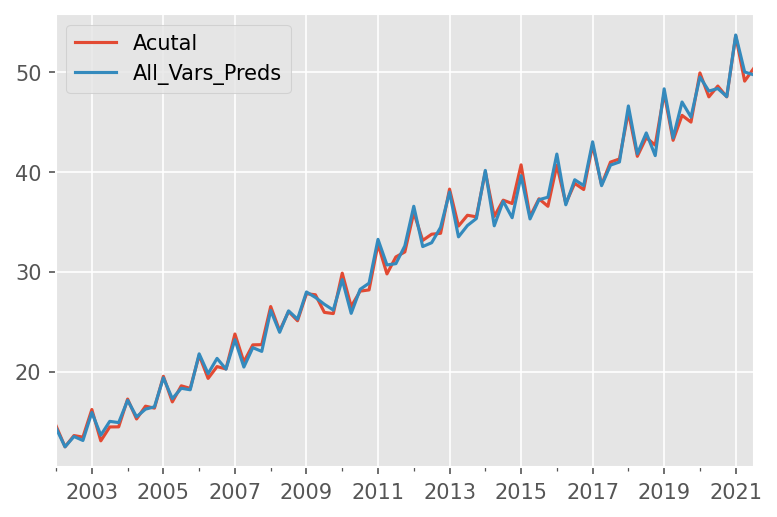

In [74]:
actual_preds = pd.concat([y_train,y_pred_all_vars],axis=1)
actual_preds.columns = ['Acutal','All_Vars_Preds']

actual_preds.plot()
plt.show()

### Remove the variables with least importance
Find the pvals of the coefficients and remove one insignificant variable at a time till we are left with all the variables to be significant

In [78]:
train = True
dropcol = 'no'
while train:
    if dropcol != 'no':
        x_train_scaled.drop(dropcol,axis=1,inplace=True)
    curr_model = sm.OLS(y_train_scaled,sm.add_constant(x_train_scaled)).fit()
    p_vals = curr_model.pvalues
    p_vals = p_vals.drop('const').sort_values()
    p_vals = p_vals[p_vals>0.05]
    if len(p_vals) != 0:
        dropcol = p_vals.index[-1]
    else:
        train=False
significant_variables = x_train_scaled.columns

print(significant_variables)

Index(['PSUNOUSDM', 'MIXRNSA', 'MNFCTRMPCIMNSA', 'MRTSMPCSM442USN',
       'LNU01300002_lag1', 'MRTSMPCSM442USN_lag1', 'CPHPLA01EZM661N_lag1',
       'WPU01130603_lag2', 'LNU01300002_lag3', 'MNFCTRMPCIMNSA_lag3',
       'WPU01130603_lag3', 'MRTSMPCSM442USN_lag3', 'CPHPLA01EZM661N_lag3',
       'PSUNOUSDM_lag4', 'MRTSMPCSM442USN_lag4', 'CPHPLA01EZM661N_lag4'],
      dtype='object')


### Get the predictions using the model using only important variables

In [79]:
y_pred_imp_vars = pd.DataFrame(curr_model.predict(sm.add_constant(x_train_scaled)),index = y_train.index,columns = ['revenuePerShare'])
y_pred_imp_vars = pd.DataFrame(y_scaler.inverse_transform(y_pred_imp_vars),index= y_train.index,columns = ['revenuePerShare'])
y_pred_imp_vars = y_pred_imp_vars['revenuePerShare']
y_pred_imp_vars = np.exp(y_pred_imp_vars)
y_pred_imp_vars.name = 'Imp_Vars_Preds'

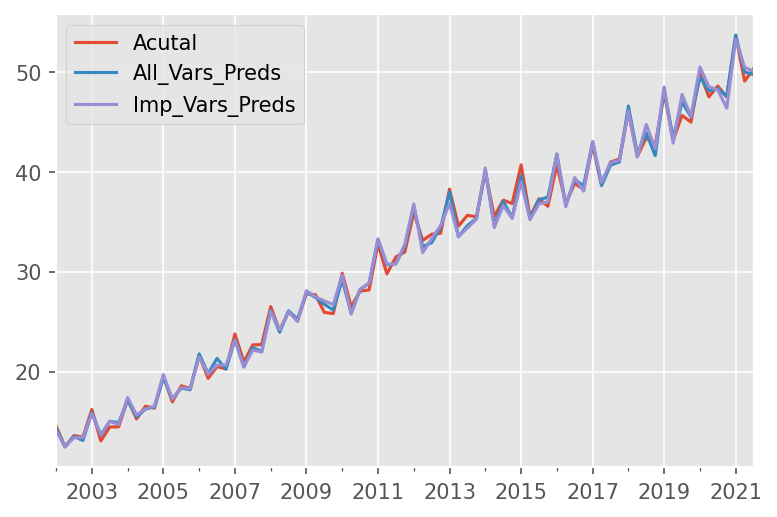

In [80]:
actual_preds = pd.concat([actual_preds,y_pred_imp_vars],axis=1)
actual_preds.plot()
plt.show()

In [81]:
remove_lag_string = significant_variables.str.replace('_lag1','').str.replace('_lag2','').str.replace('_lag3','').str.replace('_lag4','')
impvars_details = fed_indics_details.loc[fed_indics_details['id'].isin(remove_lag_string),:]
impvars_details[['id','title']]

,id,title
1,PSUNOUSDM,Global price of Sunflower Oil
2,LNU01300002,Labor Force Participation Rate - Women
3,MIXRNSA,S&P/Case-Shiller FL-Miami Home Price Index
6,MRTSMPCSM442USN,Retail Sales: Furniture and Home Furnishings S...
8,CPHPLA01EZM661N,Consumer Price Index: Harmonized Prices: Total...
9,MNFCTRMPCIMNSA,Manufacturers Inventories
10,WPU01130603,Producer Price Index by Commodity: Farm Produc...
